# Random Forest Classifier for Injection Molding of Bins using tsfresh data

In [1]:
# For data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
import my_preprocessing_functions as mpf

# For displaying results
import seaborn as sn
import os

In [2]:
filename = 'extracted_features_with_pv_0.01.csv'
data_path = os.getcwd() + "/Data/"
dataset_df = pd.read_csv(data_path + filename)

In [3]:
dataset_df.head()

,Unnamed: 0,ramposition__number_cwt_peaks__n_5,"ramposition__fft_coefficient__attr_""real""__coeff_27","ramposition__fft_coefficient__attr_""real""__coeff_34","ramposition__fft_coefficient__attr_""angle""__coeff_26","ramposition__fft_coefficient__attr_""angle""__coeff_37","ramposition__fft_coefficient__attr_""angle""__coeff_40","ramposition__fft_coefficient__attr_""angle""__coeff_79",ramposition__lempel_ziv_complexity__bins_100,"ramposition_time__fft_coefficient__attr_""real""__coeff_34",...,"sensor_pressure_time__fft_coefficient__attr_""angle""__coeff_18","sensor_pressure_time__fft_coefficient__attr_""angle""__coeff_22","sensor_pressure_time__fft_coefficient__attr_""angle""__coeff_25","sensor_pressure_time__fft_coefficient__attr_""angle""__coeff_27","sensor_pressure_time__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""mean""",sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_3,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_4,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_5,sensor_pressure_time__energy_ratio_by_chunks__num_segments_10__segment_focus_6,valid_or_not
0,0,13.0,0.036913,0.031473,-64.767665,-53.355534,-51.710974,-9.374110,0.632184,-9.823924,...,115.887430,122.295279,125.857211,128.665900,0.896443,0.002516,0.003723,0.005158,0.006760,1
1,1,15.0,0.035980,0.031803,-63.872763,-53.822133,-49.520055,-8.289922,0.627119,-9.733922,...,116.003246,121.769883,125.494392,128.110645,0.898174,0.002587,0.003822,0.005301,0.006941,1
2,2,16.0,0.035799,0.031927,-64.832958,-53.121633,-51.051893,-10.163140,0.629213,-9.761975,...,116.513385,122.328672,125.731397,128.274306,0.899917,0.002831,0.004164,0.005747,0.007492,1
3,3,11.0,0.036715,0.031617,-64.265876,-53.308805,-49.517241,-7.751796,0.625000,-9.703095,...,115.995170,121.868618,125.867359,128.342362,0.898130,0.002668,0.003941,0.005464,0.007167,1
4,4,15.0,0.035859,0.031930,-63.777411,-52.712442,-50.427247,-10.251090,0.630682,-9.559814,...,115.463086,121.168742,124.916480,128.229129,0.898035,0.002650,0.003914,0.005419,0.007110,1


In [4]:
dataset_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
def check_imbalance(label: pd.Series) -> None:
    pv = np.count_nonzero(label) / len(label) * 100
    print(f"The imbalance profile has:\n {pv:.2f}% of valid products and \
        \n {100 - pv:.2f}% of invalid products")

In [6]:
print('For the full dataset,')
check_imbalance(dataset_df['valid_or_not'])

For the full dataset,
The imbalance profile has:
 70.04% of valid products and         
 29.96% of invalid products


## Random Forest Pilot Test
- We will perform quickly the random forest classifier to get an estimation of the initial f1 score for the minority class (invalid products)

In [7]:
dataset_df = pd.read_csv(data_path + filename)
features = dataset_df.drop("valid_or_not", axis=1)
labels = dataset_df["valid_or_not"]
features = features.pipe(mpf.normalize).pipe(mpf.drop_rows_with_only_nan_values)
features, labels = mpf.balance(features, labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [8]:
print('For the training set,')
check_imbalance(y_train)
print('\nFor the test set,')
check_imbalance(y_test)

For the training set,
The imbalance profile has:
 49.59% of valid products and         
 50.41% of invalid products

For the test set,
The imbalance profile has:
 51.62% of valid products and         
 48.38% of invalid products


In [9]:
# Random Forest classificator evaluator function
def rfc_train_evaluator(model_rfc, Xtrain, ytrain, Xtest, ytest) -> tuple:
    model_rfc.fit(Xtrain, ytrain)
    mean_accuracy = model_rfc.score(Xtest, ytest) * 100
    y_predicted = model_rfc.predict(Xtest)
    return (mean_accuracy, y_predicted)

In [10]:
pilot_model_rfc = RandomForestClassifier(bootstrap=True, random_state=42, n_jobs=-1)

In [11]:
pilot_model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
pilot_accuracy, pilot_predictions = rfc_train_evaluator(pilot_model_rfc, X_train, y_train, X_test, y_test)
cm = confusion_matrix(y_test, pilot_predictions)

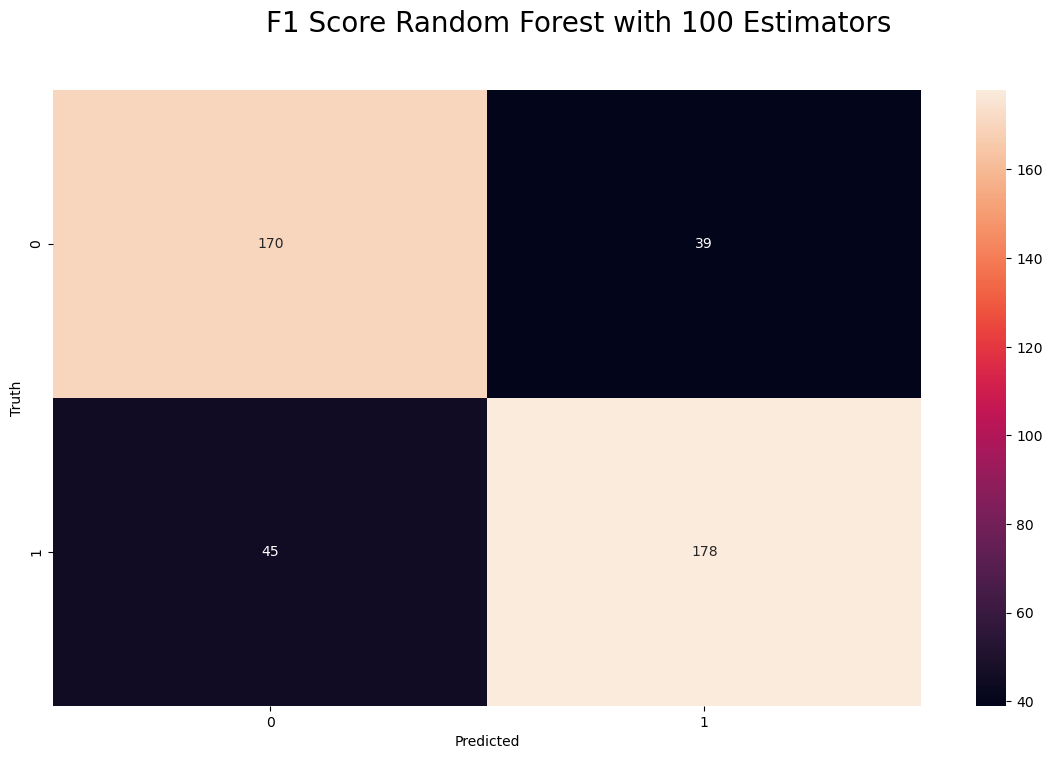

In [13]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("F1 Score Random Forest with 100 Estimators", fontsize=fs)
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [14]:
f1_scores = f1_score(y_test, pilot_predictions, average=None)
print(f"The f1 scores for the not valid and valid classes are respectively {f1_scores[0]:.2f} and {f1_scores[1]:.2f}")

The f1 scores for the not valid and valid classes are respectively 0.80 and 0.81


- 0.79 and 0.77
- 0.81 and 0.79
- 0.80 and 0.81